<a href="https://colab.research.google.com/github/PranayJagtap06/ML_Projects/blob/main/OnlinePaymentsFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Online Payments Fraud Detection

In this project I will solve a classification problem on online fraud payments detection using machine learning. For this task, I collected a [dataset](https://www.kaggle.com/datasets/ealaxi/paysim1?resource=download) from Kaggle, which contains historical information about fraudulent transactions which can be used to detect fraud in online payments.

Below are all the columns from the dataset I’m using here:

- *step*: represents a unit of time where 1 step equals 1 hour
- *type*: type of online transaction
- *amount*: the amount of the transaction
- *nameOrig*: customer starting the transaction
- *oldbalanceOrg*: balance before the transaction
- *newbalanceOrig*: balance after the transaction
- *nameDest*: recipient of the transaction
- *oldbalanceDest*: initial balance of recipient before the transaction
- *newbalanceDest*: the new balance of recipient after the transaction
- *isFraud*: fraud transaction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing necessary libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from plotly.offline import init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
import plotly.express as px

In [ ]:
import plotly.io as pio
pio.renderers.default = "colab"

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/online_payments_fraud.csv')

### Dataset Cleaning and Evaluation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [ ]:
merged_df = pd.merge(df[df['isFraud']==1], df[df['isFlaggedFraud']==1], how='outer', indicator=True)

In [ ]:
common_rows = merged_df[merged_df['_merge'] == 'both']

In [ ]:
len(common_rows)

16

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

No null values present in the dataset. No cleaning of the dataset needed.

### EDA

In [ ]:
# Correlation between isFraud feature with other features
df.corr(numeric_only=True)['isFraud'].sort_values(ascending=False)[1:].iplot(kind='bar')

The correlation plot shows that isFraud feature is most correlated with the amount of transaction made, though it is only 7.6%. isFraud feature is negatively correlated with oldbalanceDest and newbalanceOrig features.

In [ ]:
df.type.value_counts().sort_values()

DEBIT         41432
TRANSFER     532909
CASH_IN     1399284
PAYMENT     2151495
CASH_OUT    2237500
Name: type, dtype: int64

In [ ]:
px.pie(data_frame=df, values=df.type.value_counts().sort_values().values, names=df.type.value_counts().sort_values().index, title='Distribution of Transaction Type')

The above transaction type distribution shows that CASH_OUT, PAYMENT and CASH_IN are top 3 most preferred transaction types with TRANSFER and DEBIT being the least preferred.

### Tailoring dataset

In [ ]:
df['type'] = df['type'].map({'CASH_OUT':1, 'PAYMENT':2, 'CASH_IN': 3, 'TRANSFER': 4, 'DEBIT': 5})
df['isFraud'] = df['isFraud'].map({0: 'No Fraud', 1: 'Fraud'})
# df['isFlaggedFraud'] = df['isFlaggedFraud'].map({0: 'No Fraud', 1: 'Fraud'})

In [ ]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [ ]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,170136.0,160296.36,0.0,0.0,No Fraud,0
1,1,2,1864.28,21249.0,19384.72,0.0,0.0,No Fraud,0
2,1,4,181.00,181.0,0.00,0.0,0.0,Fraud,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,Fraud,0
4,1,2,11668.14,41554.0,29885.86,0.0,0.0,No Fraud,0


In [ ]:
from sklearn.model_selection import train_test_split

As the dataset is quite large and it may take very long to train model on such a large dataset. So I will use only a small portion of the dataset to continue with this project.

In [ ]:
current_ratio = df.isFraud.value_counts(normalize=True)
current_ratio

No Fraud    0.998709
Fraud       0.001291
Name: isFraud, dtype: float64

In [ ]:
new_df_size = 80000
nofraud_need, fraud_need = np.ceil(new_df_size*current_ratio).astype(int)

In [ ]:
df_nofraud = df[df['isFraud'] == 'No Fraud'].sample(nofraud_need)
df_fraud = df[df['isFraud'] == 'Fraud'].sample(fraud_need)
df_new = pd.concat([df_nofraud, df_fraud], ignore_index=True)
df_new.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,688,1,109998.07,292.0,0.00,52087.36,162085.43,No Fraud,0
1,279,1,25109.19,105.0,0.00,357014.21,382123.40,No Fraud,0
2,396,3,42790.56,6515.0,49305.56,53867.30,11076.74,No Fraud,0
3,156,1,317924.68,398538.0,80613.32,372134.00,690058.68,No Fraud,0
4,356,1,261249.90,313667.0,52417.10,225982.41,487232.31,No Fraud,0


In [ ]:
X_new = df_new.drop('isFraud', axis=1)
y_new = df_new.isFraud

In [ ]:
# X = df.drop('isFraud', axis=1).iloc[:80000]
# y = df.isFraud.iloc[:80000]

In [ ]:
y_new.value_counts()

No Fraud    79897
Fraud         104
Name: isFraud, dtype: int64

In [ ]:
X_train, X_out, y_train, y_out = train_test_split(X_new, y_new, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_out, y_out, test_size=0.5, random_state=42)

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
              'max_features': [2, 3, 8, 'sqrt', 'log2']
              }

In [ ]:
from sklearn.metrics import f1_score, make_scorer

# Define a custom scorer
f1_scorer = make_scorer(f1_score, pos_label='Fraud')

In [ ]:
# from sklearn.metrics import SCORERS
# print(SCORERS.keys())

In [ ]:
dtree_grid = GridSearchCV(estimator=dtree,
                          param_grid=param_grid,
                          n_jobs=-1,
                          cv=5,
                          scoring=f1_scorer,
                          error_score="raise"
                          )

In [ ]:
dtree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=DecisionTreeClassifier(),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [2, 3, 8, 'sqrt', 'log2']},
             scoring=make_scorer(f1_score, pos_label=Fraud))

In [ ]:
dtree_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=8)

In [ ]:
dtree_grid.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 8}

In [ ]:
dtree_grid.best_score_

0.784625244981196

In [ ]:
dtree_pred = dtree_grid.predict(X_val)

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score

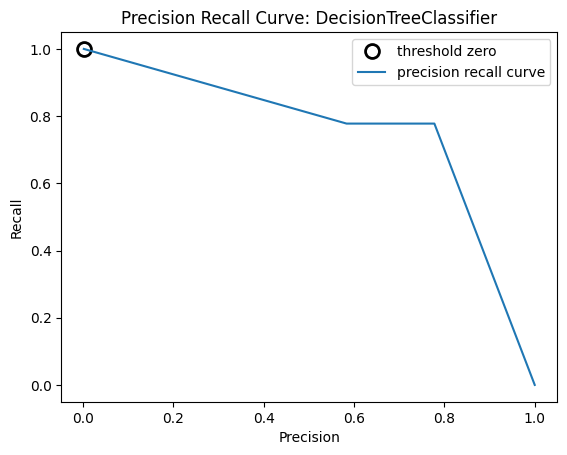

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_val, dtree_grid.best_estimator_.predict_proba(X_val)[:, 0], pos_label='Fraud')
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.title('Precision Recall Curve: DecisionTreeClassifier')
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc='best')

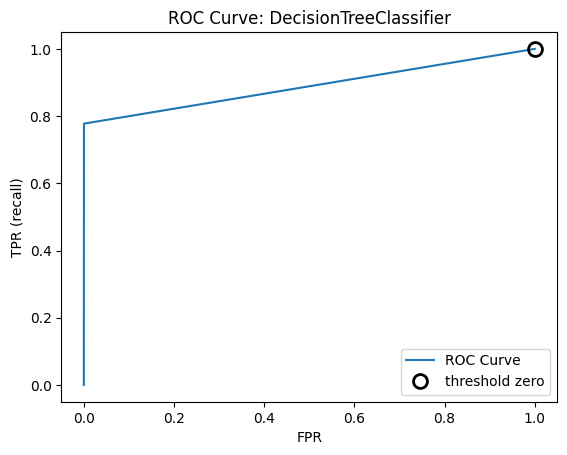

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, dtree_grid.best_estimator_.predict_proba(X_val)[:, 0], pos_label='Fraud')
plt.title('ROC Curve: DecisionTreeClassifier')
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [ ]:
print('AUC of Decision Tree: ', roc_auc_score(y_val, dtree_grid.best_estimator_.predict_proba(X_val)[:, 1]))

AUC of Decision Tree:  0.8886663328325822


Decision Tree Classifier: Confusion Matrix


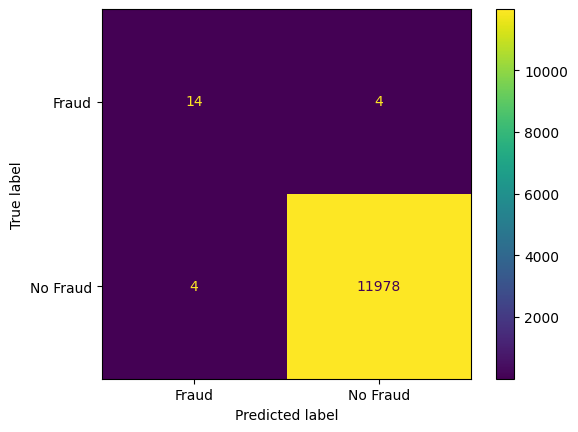

In [ ]:
print('Decision Tree Classifier: Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, dtree_pred), display_labels=dtree_grid.classes_).plot();

In [ ]:
print(f"Classification Report Decision Tree Classifier:\n{classification_report(y_val, dtree_pred)}")

Classification Report Decision Tree Classifier:
              precision    recall  f1-score   support

       Fraud       0.78      0.78      0.78        18
    No Fraud       1.00      1.00      1.00     11982

    accuracy                           1.00     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       1.00      1.00      1.00     12000



### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf_params = {'n_estimators': [10, 20, 40, 80, 100, 160],
             'criterion': ['gini', 'entropy', 'log_loss'],
             'max_depth': [2, 3, 5, 8, 10, 12],
             'max_features': [2, 3, 5, 8, 'sqrt', 'log2']
            }

In [ ]:
rf_grid = GridSearchCV(estimator=rf,
                       param_grid=rf_params,
                       n_jobs=-1,
                       cv=5,
                       scoring=f1_scorer,
                       error_score="raise"
                      )

In [ ]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=RandomForestClassifier(),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 5, 8, 10, 12],
                         'max_features': [2, 3, 5, 8, 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 40, 80, 100, 160]},
             scoring=make_scorer(f1_score, pos_label=Fraud))

In [ ]:
rf_grid.best_estimator_

RandomForestClassifier(criterion='log_loss', max_depth=12, max_features=5,
                       n_estimators=40)

In [ ]:
rf_grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 12,
 'max_features': 5,
 'n_estimators': 40}

In [ ]:
rf_grid.best_score_

0.8247012987012987

In [ ]:
rf_pred  = rf_grid.predict(X_val)

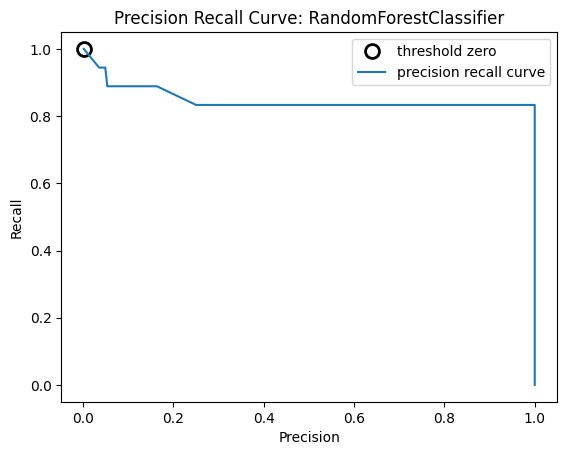

In [ ]:
rf_precision, rf_recall, rf_thresholds = precision_recall_curve(y_val, rf_grid.best_estimator_.predict_proba(X_val)[:, 0], pos_label='Fraud')
# find threshold closest to zero
rf_close_zero = np.argmin(np.abs(rf_thresholds))
plt.plot(rf_precision[rf_close_zero], rf_recall[rf_close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(rf_precision, rf_recall, label="precision recall curve")
plt.title('Precision Recall Curve: RandomForestClassifier')
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc='best')

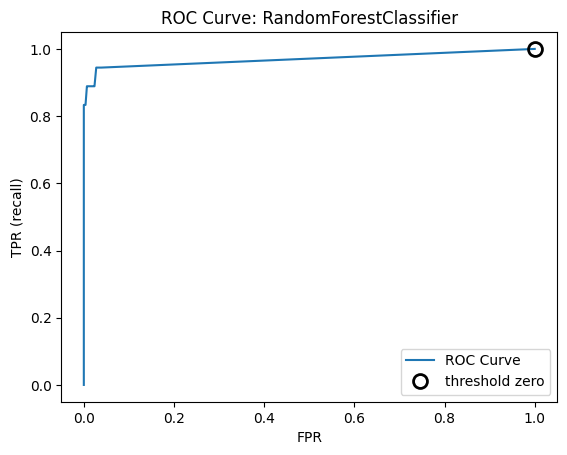

In [ ]:
rf_fpr, rf_tpr, thresholds_rf = roc_curve(y_val, rf_grid.best_estimator_.predict_proba(X_val)[:, 0], pos_label='Fraud')
plt.plot(rf_fpr, rf_tpr, label="ROC Curve")
plt.title('ROC Curve: RandomForestClassifier')
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero_rf = np.argmin(np.abs(thresholds_rf))
plt.plot(rf_fpr[close_zero_rf], rf_tpr[close_zero_rf], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [ ]:
print('AUC of Random Forest: ', roc_auc_score(y_val, rf_grid.best_estimator_.predict_proba(X_val)[:, 1]))

AUC of Random Forest:  0.969430998349376


Random Forest Classifier: Confusion Matrix


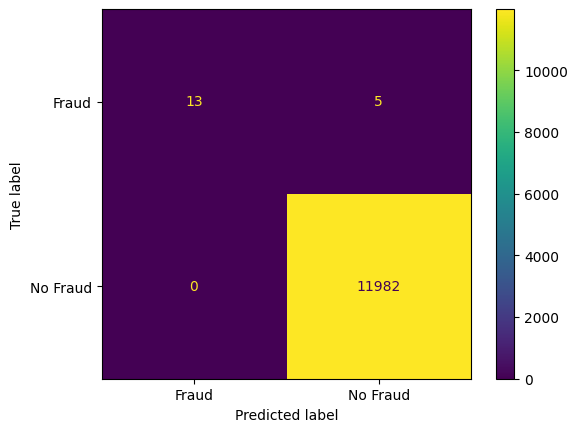

In [ ]:
print('Random Forest Classifier: Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, rf_pred), display_labels=rf_grid.classes_).plot();

In [ ]:
print(f"Classification Report Random Forest Classifier:\n{classification_report(y_val, rf_pred)}")

Classification Report Random Forest Classifier:
              precision    recall  f1-score   support

       Fraud       1.00      0.72      0.84        18
    No Fraud       1.00      1.00      1.00     11982

    accuracy                           1.00     12000
   macro avg       1.00      0.86      0.92     12000
weighted avg       1.00      1.00      1.00     12000



### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_param = {'penalty': ['l2'],
             'C': [0.001, 0.01, 0.1, 1, 5, 10],
             'solver': ['lbfgs', 'liblinear', 'newton-cholesky', 'sag'],
             'max_iter': [5000]
             }

In [ ]:
log_grid = GridSearchCV(estimator=log_model,
                       param_grid=log_param,
                       n_jobs=-1,
                       cv=5,
                       scoring=f1_scorer,
                       error_score="raise"
                      )

In [ ]:
log_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=LogisticRegression(),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10], 'max_iter': [5000],
                         'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cholesky',
                                    'sag']},
             scoring=make_scorer(f1_score, pos_label=Fraud))

In [ ]:
log_grid.best_estimator_

LogisticRegression(C=0.001, max_iter=5000, solver='newton-cholesky')

In [ ]:
log_grid.best_params_

{'C': 0.001, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'newton-cholesky'}

In [ ]:
log_grid.best_score_

0.666022866022866

In [ ]:
log_pred = log_grid.predict(X_val)

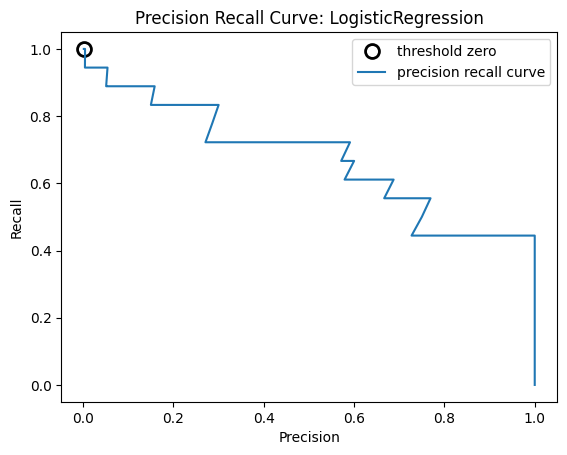

In [ ]:
log_precision, log_recall, log_thresholds = precision_recall_curve(y_val, log_grid.best_estimator_.predict_proba(X_val)[:, 0], pos_label='Fraud')
# find threshold closest to zero
log_close_zero = np.argmin(np.abs(log_thresholds))
plt.plot(log_precision[log_close_zero], log_recall[log_close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(log_precision, log_recall, label="precision recall curve")
plt.title('Precision Recall Curve: LogisticRegression')
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc='best')

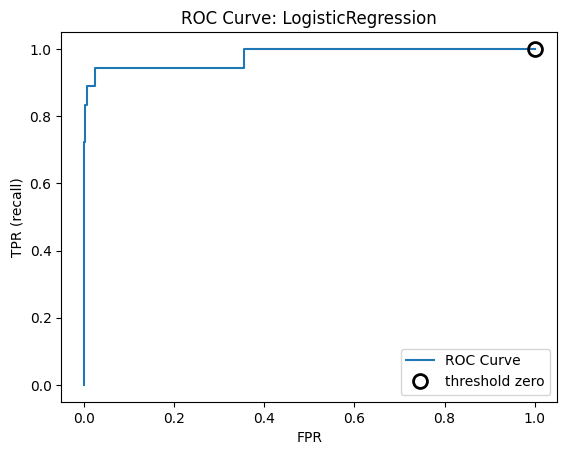

In [ ]:
log_fpr, log_tpr, thresholds_log = roc_curve(y_val, log_grid.best_estimator_.predict_proba(X_val)[:, 0], pos_label='Fraud')
plt.plot(log_fpr, log_tpr, label="ROC Curve")
plt.title('ROC Curve: LogisticRegression')
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero_log = np.argmin(np.abs(thresholds_log))
plt.plot(log_fpr[close_zero_log], log_tpr[close_zero_log], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [ ]:
print('AUC of Logistic Regression: ', roc_auc_score(y_val, log_grid.best_estimator_.predict_proba(X_val)[:, 1]))

AUC of Logistic Regression:  0.9779901333481704


Logistic Regression: Confusion Matrix


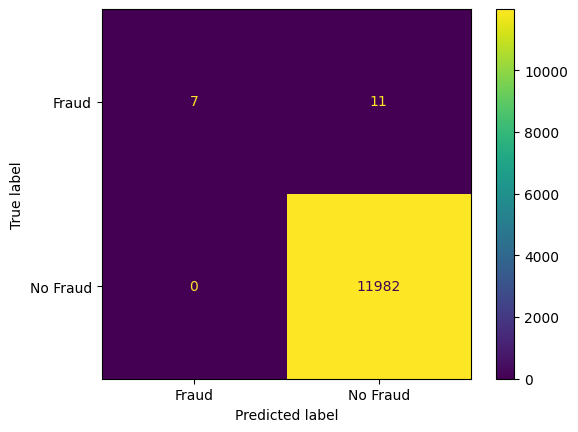

In [ ]:
print('Logistic Regression: Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, log_pred), display_labels=log_grid.classes_).plot();

In [ ]:
print(f"Classification Report Logistic Regression:\n{classification_report(y_val, log_pred)}")

Classification Report Logistic Regression:
              precision    recall  f1-score   support

       Fraud       1.00      0.39      0.56        18
    No Fraud       1.00      1.00      1.00     11982

    accuracy                           1.00     12000
   macro avg       1.00      0.69      0.78     12000
weighted avg       1.00      1.00      1.00     12000



In [ ]:
from sklearn.svm import LinearSVC, SVC

### LinearSVC

In [ ]:
linear_svc = LinearSVC()

In [ ]:
linear_svc_param = {'penalty': ['l1', 'l2'],
                    'C': [0.001, 0.01, 0.1, 1, 5, 10],
                    'dual': [False],
                    'max_iter': [20000]
                    }

In [ ]:
linear_svc_grid = GridSearchCV(estimator=linear_svc,
                       param_grid=linear_svc_param,
                       n_jobs=-1,
                       cv=5,
                       scoring=f1_scorer,
                       error_score="raise"
                      )

In [ ]:
linear_svc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10], 'dual': [False],
                         'max_iter': [20000], 'penalty': ['l1', 'l2']},
             scoring=make_scorer(f1_score, pos_label=Fraud))

In [ ]:
linear_svc_grid.best_estimator_

LinearSVC(C=0.001, dual=False, max_iter=20000, penalty='l1')

In [ ]:
linear_svc_grid.best_score_

0.5337491445664728

In [ ]:
lsvc_pred = linear_svc_grid.predict(X_val)

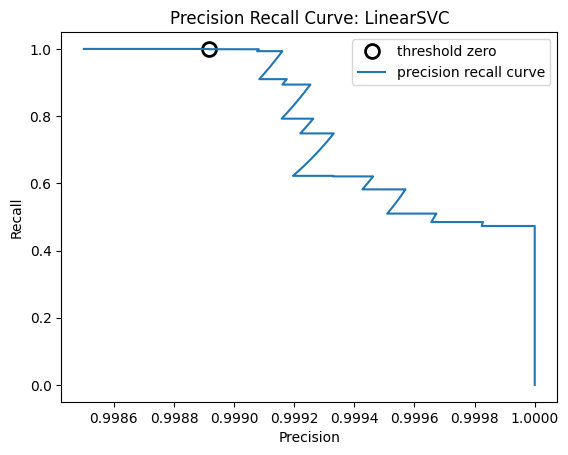

In [ ]:
lsvc_precision, lsvc_recall, lsvc_thresholds = precision_recall_curve(y_val, linear_svc_grid.best_estimator_.decision_function(X_val), pos_label='No Fraud')
# find threshold closest to zero
lsvc_close_zero = np.argmin(np.abs(lsvc_thresholds))
plt.plot(lsvc_precision[lsvc_close_zero], lsvc_recall[lsvc_close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(lsvc_precision, lsvc_recall, label="precision recall curve")
plt.title('Precision Recall Curve: LinearSVC')
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc='best')

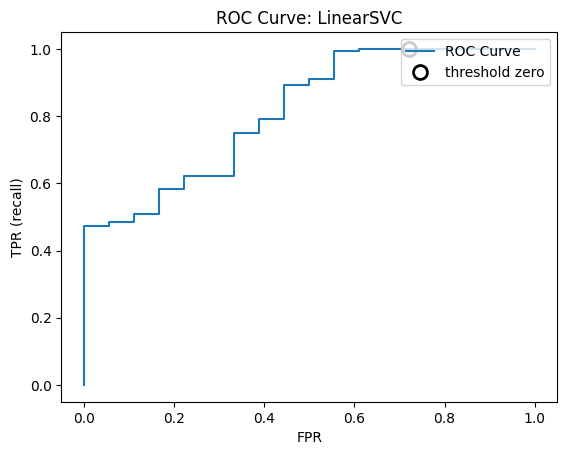

In [ ]:
lsvc_fpr, lsvc_tpr, thresholds_lsvc = roc_curve(y_val, linear_svc_grid.best_estimator_.decision_function(X_val), pos_label='No Fraud')
plt.plot(lsvc_fpr, lsvc_tpr, label="ROC Curve")
plt.title('ROC Curve: LinearSVC')
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero_lsvc = np.argmin(np.abs(thresholds_lsvc))
plt.plot(lsvc_fpr[close_zero_lsvc], lsvc_tpr[close_zero_lsvc], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=1)

In [ ]:
print('AUC of LinearSVC: ', roc_auc_score(y_val, linear_svc_grid.best_estimator_.decision_function(X_val)))

AUC of LinearSVC:  0.8127144420334206


LinearSVC: Confusion Matrix


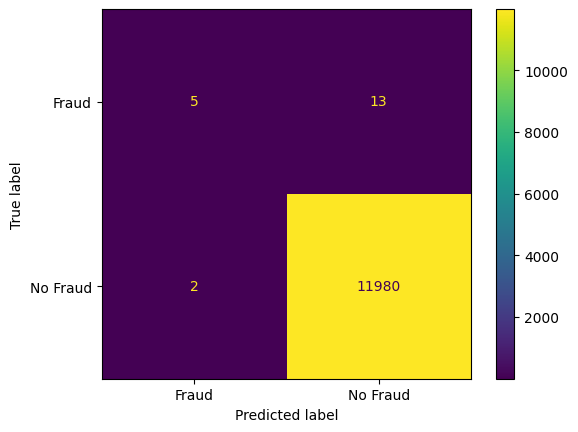

In [ ]:
print('LinearSVC: Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, lsvc_pred), display_labels=linear_svc_grid.classes_).plot();

In [ ]:
print(f"Classification Report LinearSVC:\n{classification_report(y_val, lsvc_pred)}")

Classification Report LinearSVC:
              precision    recall  f1-score   support

       Fraud       0.71      0.28      0.40        18
    No Fraud       1.00      1.00      1.00     11982

    accuracy                           1.00     12000
   macro avg       0.86      0.64      0.70     12000
weighted avg       1.00      1.00      1.00     12000



### Support Vector Classifier (SVC)

In [ ]:
svc = SVC()

In [ ]:
svc_param = {'C': [0.001, 0.01, 0.1, 1, 5, 10, 15],
             'gamma': ['scale', 0.01, 0.1, 1, 5, 10, 15],
             'kernel': ['rbf', 'sigmoid']
             }

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)

In [ ]:
svc_grid = GridSearchCV(estimator=svc,
                       param_grid=svc_param,
                       n_jobs=-1,
                       cv=5,
                       scoring=f1_scorer,
                       error_score="raise"
                      )

In [ ]:
svc_grid.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 15],
                         'gamma': ['scale', 0.01, 0.1, 1, 5, 10, 15],
                         'kernel': ['rbf', 'sigmoid']},
             scoring=make_scorer(f1_score, pos_label=Fraud))

In [ ]:
svc_grid.best_estimator_

SVC(C=15)

In [ ]:
svc_grid.best_params_

{'C': 15, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
svc_grid.best_score_

0.4865584415584416

In [ ]:
svc_pred = svc_grid.predict(scaled_X_val)

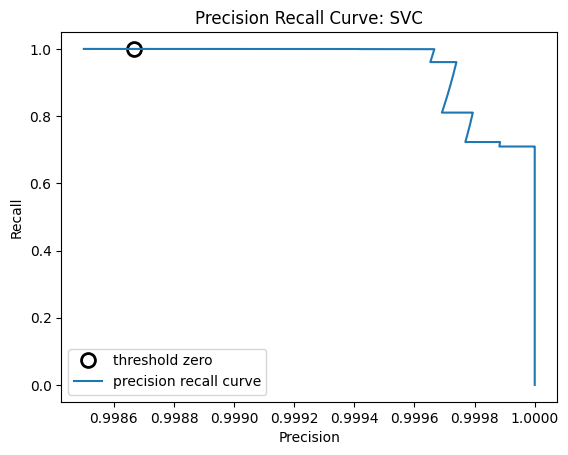

In [ ]:
svc_precision, svc_recall, svc_thresholds = precision_recall_curve(y_val, svc_grid.best_estimator_.decision_function(scaled_X_val), pos_label='No Fraud')
# find threshold closest to zero
svc_close_zero = np.argmin(np.abs(svc_thresholds))
plt.plot(svc_precision[svc_close_zero], svc_recall[svc_close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(svc_precision, svc_recall, label="precision recall curve")
plt.title('Precision Recall Curve: SVC')
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc='best')

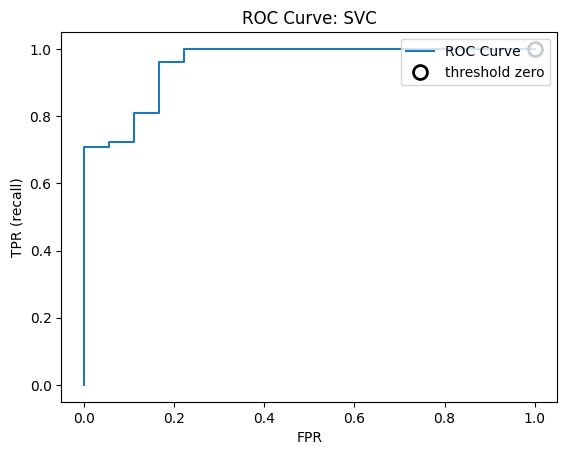

In [ ]:
svc_fpr, svc_tpr, thresholds_svc = roc_curve(y_val, svc_grid.best_estimator_.decision_function(scaled_X_val), pos_label='No Fraud')
plt.plot(svc_fpr, svc_tpr, label="ROC Curve")
plt.title('ROC Curve: SVC')
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero_svc = np.argmin(np.abs(thresholds_svc))
plt.plot(svc_fpr[close_zero_svc], svc_tpr[close_zero_svc], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=1)

In [ ]:
print('AUC of SVC: ', roc_auc_score(y_val, svc_grid.best_estimator_.decision_function(scaled_X_val)))

AUC of SVC:  0.9556510691963871


SVC: Confusion Matrix


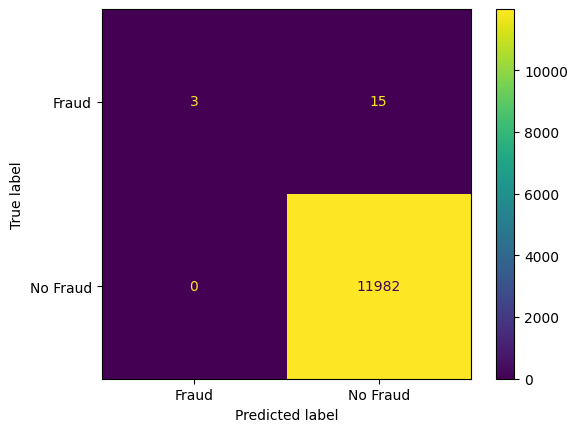

In [ ]:
print('SVC: Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, svc_pred), display_labels=svc_grid.classes_).plot();

In [ ]:
print(f"Classification Report SVC:\n{classification_report(y_val, svc_pred)}")

Classification Report SVC:
              precision    recall  f1-score   support

       Fraud       1.00      0.17      0.29        18
    No Fraud       1.00      1.00      1.00     11982

    accuracy                           1.00     12000
   macro avg       1.00      0.58      0.64     12000
weighted avg       1.00      1.00      1.00     12000



### K Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn_param = {'n_neighbors': [1, 3, 5, 7, 9, 11],
             'algorithm': ['auto']}

In [ ]:
knn_grid = GridSearchCV(estimator=knn,
                       param_grid=knn_param,
                       n_jobs=-1,
                       cv=5,
                       scoring=f1_scorer,
                       error_score="raise"
                      )

In [ ]:
knn_grid.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=KNeighborsClassifier(),
             n_jobs=-1,
             param_grid={'algorithm': ['auto'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11]},
             scoring=make_scorer(f1_score, pos_label=Fraud))

In [ ]:
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_grid.best_score_

0.48833253702818913

In [ ]:
knn_pred = knn_grid.predict(scaled_X_val)

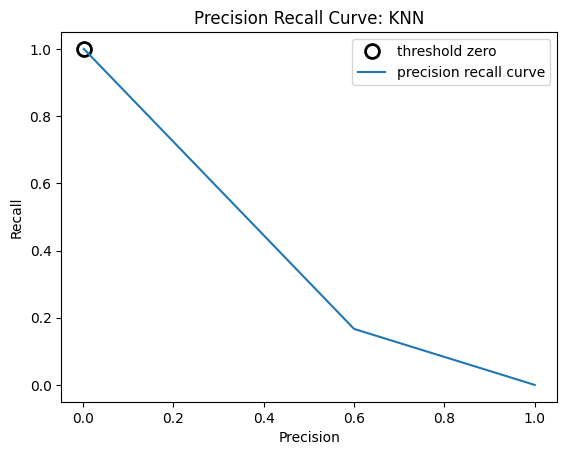

In [ ]:
knn_precision, knn_recall, knn_thresholds = precision_recall_curve(y_val, knn_grid.best_estimator_.predict_proba(scaled_X_val)[:, 0], pos_label='Fraud')
# find threshold closest to zero
knn_close_zero = np.argmin(np.abs(knn_thresholds))
plt.plot(knn_precision[knn_close_zero], knn_recall[knn_close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(knn_precision, knn_recall, label="precision recall curve")
plt.title('Precision Recall Curve: KNN')
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc='best')

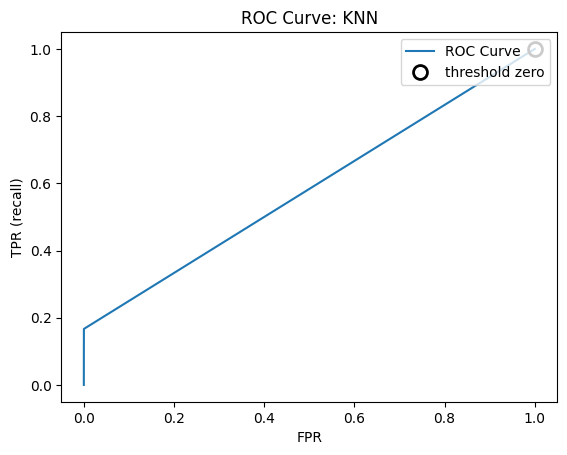

In [ ]:
knn_fpr, knn_tpr, thresholds_knn = roc_curve(y_val, knn_grid.best_estimator_.predict_proba(scaled_X_val)[:, 0], pos_label='Fraud')
plt.plot(knn_fpr, knn_tpr, label="ROC Curve")
plt.title('ROC Curve: KNN')
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero_knn = np.argmin(np.abs(thresholds_knn))
plt.plot(knn_fpr[close_zero_knn], knn_tpr[close_zero_knn], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=1)

In [ ]:
print('AUC of KNN: ', roc_auc_score(y_val, knn_grid.best_estimator_.predict_proba(scaled_X_val)[:, 1]))

AUC of KNN:  0.5832498748122183


KNN: Confusion Matrix


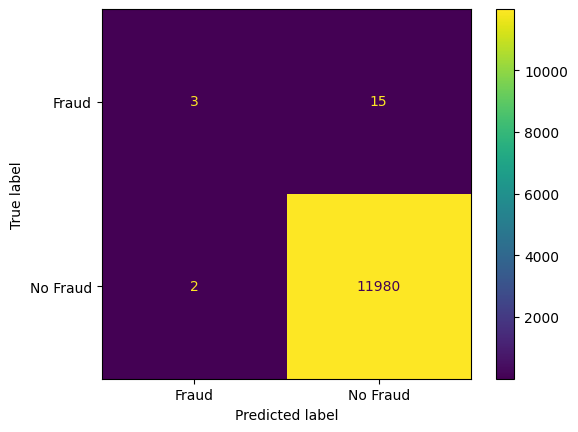

In [ ]:
print('KNN: Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, knn_pred), display_labels=knn_grid.classes_).plot();

In [ ]:
print(f"Classification Report KNN:\\n{classification_report(y_val, knn_pred)}")

Classification Report KNN:\n              precision    recall  f1-score   support

       Fraud       0.60      0.17      0.26        18
    No Fraud       1.00      1.00      1.00     11982

    accuracy                           1.00     12000
   macro avg       0.80      0.58      0.63     12000
weighted avg       1.00      1.00      1.00     12000



After evaluating these trained models its clear that Decision Tree Classifier and Random Forest Classifier performed pretty well than other models. The classification report of random forest classifier is little better than decision tree classifier but decision tree classifier classified more fraud class correctly. So I will use decision tree classifier for my final test set.

### Final Test Set Evaluation

In [ ]:
test_pred = dtree_grid.predict(X_test)

Decision Tree Classifier: Test Set Confusion Matrix


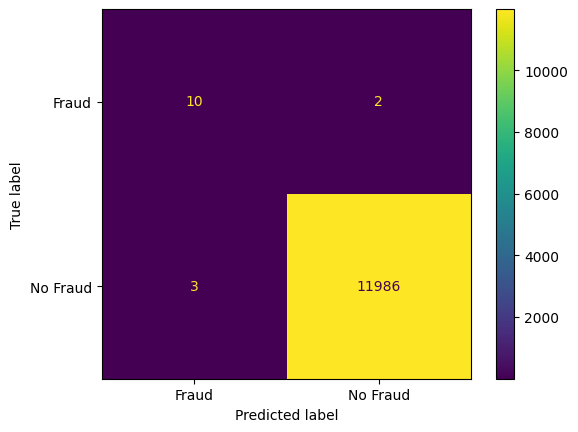

In [ ]:
print('Decision Tree Classifier: Test Set Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_pred), display_labels=dtree_grid.classes_).plot();

In [ ]:
print(f"Classification Report Decision Tree Classifier Test Set:\n{classification_report(y_test, test_pred)}")

Classification Report Decision Tree Classifier Test Set:
              precision    recall  f1-score   support

       Fraud       0.77      0.83      0.80        12
    No Fraud       1.00      1.00      1.00     11989

    accuracy                           1.00     12001
   macro avg       0.88      0.92      0.90     12001
weighted avg       1.00      1.00      1.00     12001



In [ ]:
feature_names = ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']
features = np.array([[1, 1, 100000.0, 100000.0, 0.0, 0.0, 0.0, 0]])
features_df = pd.DataFrame(features, columns=feature_names)
print(dtree_grid.predict(features_df))

['Fraud']


### Conclusion
So the decision tree classifier performs well on the final test set correctly classifying most of the fraud payments. It also correctly classified the features_df.